<a href="https://colab.research.google.com/github/mhmdParvari/Assignment-10/blob/main/53.%20Custom%20CNN/animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

## Augmenting the dataset

In [ ]:
import imageio
from imgaug import augmenters as iaa

In [ ]:
seq = iaa.Sequential([
    iaa.Affine(rotate=(-45, 45)),
    iaa.AdditiveGaussianNoise(scale=(10, 60)),
    iaa.Crop(percent=(0, 0.2)),
    iaa.Fliplr(.5)
], random_order=True)

In [ ]:
root = '/content/drive/MyDrive/datasets/animal'
labels = os.listdir(root)
for label in labels:
  for img in os.listdir(os.path.join(root, label)):
    img_path = os.path.join(root, label, img)
    image = imageio.imread(img_path)
    aug_imgs = [seq(image=image) for _ in range(2)]
    new_path = os.path.join('/content/drive/MyDrive/datasets/animal_augmented', label)
    for i, aug_img in enumerate(aug_imgs):
      imageio.imwrite(os.path.join(new_path, f'aug{i+1}_'+img), aug_img)
    imageio.imwrite(os.path.join(new_path, img), image)

## Loading the augmented dataset

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = '/content/drive/MyDrive/datasets/animal_augmented'
idg = ImageDataGenerator(rescale=1./255, validation_split=.2)

train_data = idg.flow_from_directory(dataset_path, shuffle=True, subset='training', target_size=(224,224))
validation_datas = idg.flow_from_directory(dataset_path, shuffle=True, subset='validation', target_size=(224,224))

Found 3130 images belonging to 5 classes.
Found 779 images belonging to 5 classes.


## model

In [ ]:
# vgg16
# model = models.Sequential([
#     layers.Conv2D(input_shape=(224,224,3), filters=64, kernel_size=(3,3), padding='same', activation='relu'),
#     layers.Conv2D(64, (3,3), padding='same', activation='relu'),
#     layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
#     layers.Conv2D(128, (3,3), padding='same', activation='relu'),
#     layers.Conv2D(128, (3,3), padding='same', activation='relu'),
#     layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
#     layers.Conv2D(256, (3,3), padding='same', activation='relu'),
#     layers.Conv2D(256, (3,3), padding='same', activation='relu'),
#     layers.Conv2D(256, (3,3), padding='same', activation='relu'),
#     layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
#     layers.Conv2D(512, (3,3), padding='same', activation='relu'),
#     layers.Conv2D(512, (3,3), padding='same', activation='relu'),
#     layers.Conv2D(512, (3,3), padding='same', activation='relu'),
#     layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
#     layers.Conv2D(512, (3,3), padding='same', activation='relu'),
#     layers.Conv2D(512, (3,3), padding='same', activation='relu'),
#     layers.Conv2D(512, (3,3), padding='same', activation='relu'),
#     layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
#     layers.Flatten(),

#     layers.Dense(256, 'relu'),
#     layers.Dense(128, 'relu'),
#     layers.Dense(5, 'softmax'),
# ])

In [32]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(512, activation="relu"),
    layers.Dense(5, activation="softmax"),
])

In [33]:
model.compile(tf.keras.optimizers.Adam(), tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.fit(train_data, epochs=10, validation_data=validation_datas)

Epoch 1/10
98/98 [==============================] - 44s 415ms/step - loss: 1.6089 - accuracy: 0.3173 - val_loss: 1.5213 - val_accuracy: 0.3453
Epoch 2/10
98/98 [==============================] - 39s 395ms/step - loss: 1.1954 - accuracy: 0.5067 - val_loss: 1.1139 - val_accuracy: 0.5392
Epoch 3/10
98/98 [==============================] - 40s 412ms/step - loss: 0.9145 - accuracy: 0.6419 - val_loss: 1.0702 - val_accuracy: 0.5738
Epoch 4/10
98/98 [==============================] - 39s 402ms/step - loss: 0.5845 - accuracy: 0.7850 - val_loss: 1.0257 - val_accuracy: 0.6046
Epoch 5/10
98/98 [==============================] - 40s 404ms/step - loss: 0.2847 - accuracy: 0.9032 - val_loss: 1.3123 - val_accuracy: 0.6136
Epoch 6/10
98/98 [==============================] - 39s 402ms/step - loss: 0.1193 - accuracy: 0.9594 - val_loss: 1.8683 - val_accuracy: 0.5905
Epoch 7/10
98/98 [==============================] - 40s 412ms/step - loss: 0.0740 - accuracy: 0.9789 - val_loss: 1.8187 - val_accuracy: 0.6213

## confusion matrix

25/25 [==============================] - 11s 411ms/step
[[37 37 28 25 45]
 [38 34 23 38 54]
 [27 20 18 26 36]
 [31 20 18 28 37]
 [39 26 25 29 40]]


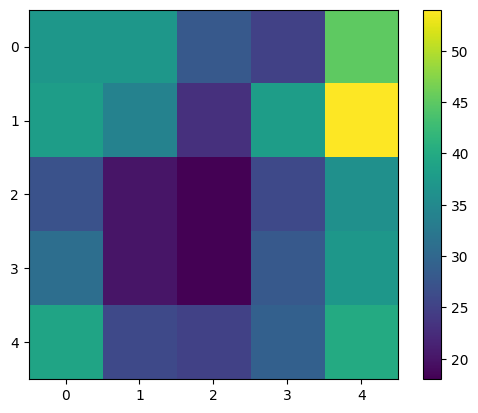

In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_predict = model.predict(validation_datas)
y_pred = np.argmax(y_predict, axis=1)
m = confusion_matrix(validation_datas.labels, y_pred)
print(m)
plt.imshow(m)
plt.colorbar()